<a href="https://colab.research.google.com/github/diyapant-max/python-foundation/blob/main/data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Impact on job market 2030

In [4]:
import pandas as pd
#Raw file URL from Github
raw_file_url = 'https://raw.githubusercontent.com/savitha14june/ai-impact-2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv'

#Read csv file
df = pd.read_csv(raw_file_url)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

Data cleanup

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [ ]:
#Check unique values
print(df['Job_Title'].unique())
print(df['Education_Level'].unique())
print(df['Risk_Category'].unique())

['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']
["Master's" 'PhD' 'High School' "Bachelor's"]
['High' 'Low' 'Medium']


In [ ]:
#Write df to cleanup file
df.to_csv('ai_impact_data_cleanup.csv', index=False)

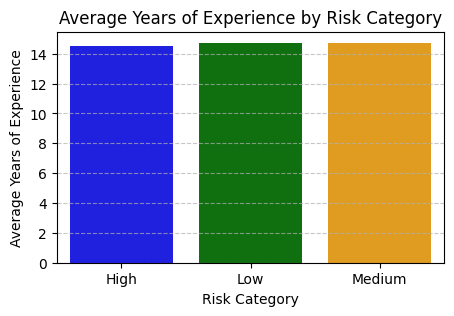

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_years_experience_by_risk = df.groupby('Risk_Category')['Years_Experience'].mean().reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(x='Risk_Category', y='Years_Experience', data=avg_years_experience_by_risk, palette=['blue','green', 'orange'], hue='Risk_Category', legend=False)
plt.title('Average Years of Experience by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Years of Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
import pandas as pd
raw_file_url = 'https://raw.githubusercontent.com/savitha14june/ai-impact-2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv'
df = pd.read_csv(raw_file_url)

experience_by_risk_category = df.groupby('Risk_Category')['Years_Experience'].agg(['min', 'max']).reset_index()
experience_by_risk_category.rename(columns={'min': 'Min_Years_Experience', 'max': 'Max_Years_Experience'}, inplace=True)
print('Minimum and Maximum Years of Experience by Risk Category:')
display(experience_by_risk_category)

Minimum and Maximum Years of Experience by Risk Category:


,Risk_Category,Min_Years_Experience,Max_Years_Experience
0,High,0,29
1,Low,0,29
2,Medium,0,29


This indicates that across all three risk categories (High, Low, and Medium), the Years_Experience column ranges from 0 to 29 years. This means there are job roles with 0 years of experience up to 29 years of experience represented within each risk category.


Explain the correlation between Years_Experience and Automation_Probability_2030
The correlation between Years_Experience and Automation_Probability_2030 was calculated to be -0.02 (as shown in cell 9156107a).

This value is very close to zero, which indicates that there is virtually no linear relationship between a person's years of experience and the automation probability of their job by 2030. In simpler terms:

An increase or decrease in years of experience does not consistently predict a corresponding increase or decrease in the automation probability of a job.
Whether someone has few or many years of experience, it does not, on its own, make their job significantly more or less likely to be automated

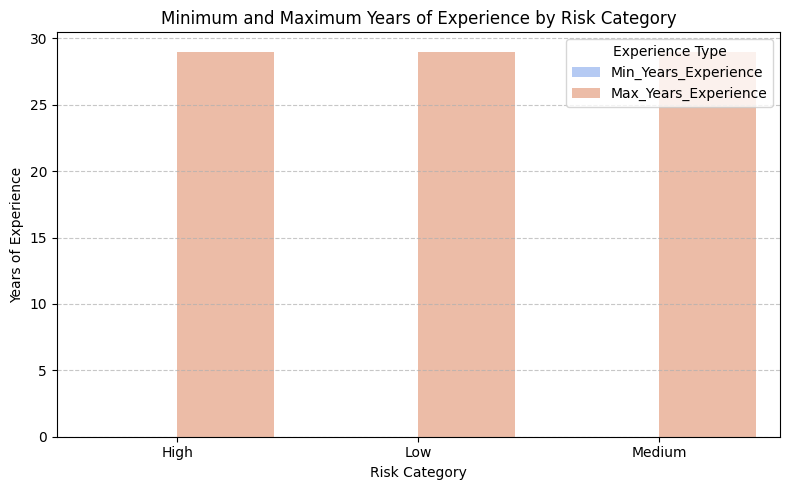

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to prepare for a grouped bar chart
experience_melted = experience_by_risk_category.melt(
    id_vars=['Risk_Category'],
    value_vars=['Min_Years_Experience', 'Max_Years_Experience'],
    var_name='Experience_Type',
    value_name='Years_Experience'
)

plt.figure(figsize=(8, 5))
sns.barplot(x='Risk_Category', y='Years_Experience', hue='Experience_Type', data=experience_melted, palette='coolwarm')
plt.title('Minimum and Maximum Years of Experience by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Years of Experience')
plt.legend(title='Experience Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

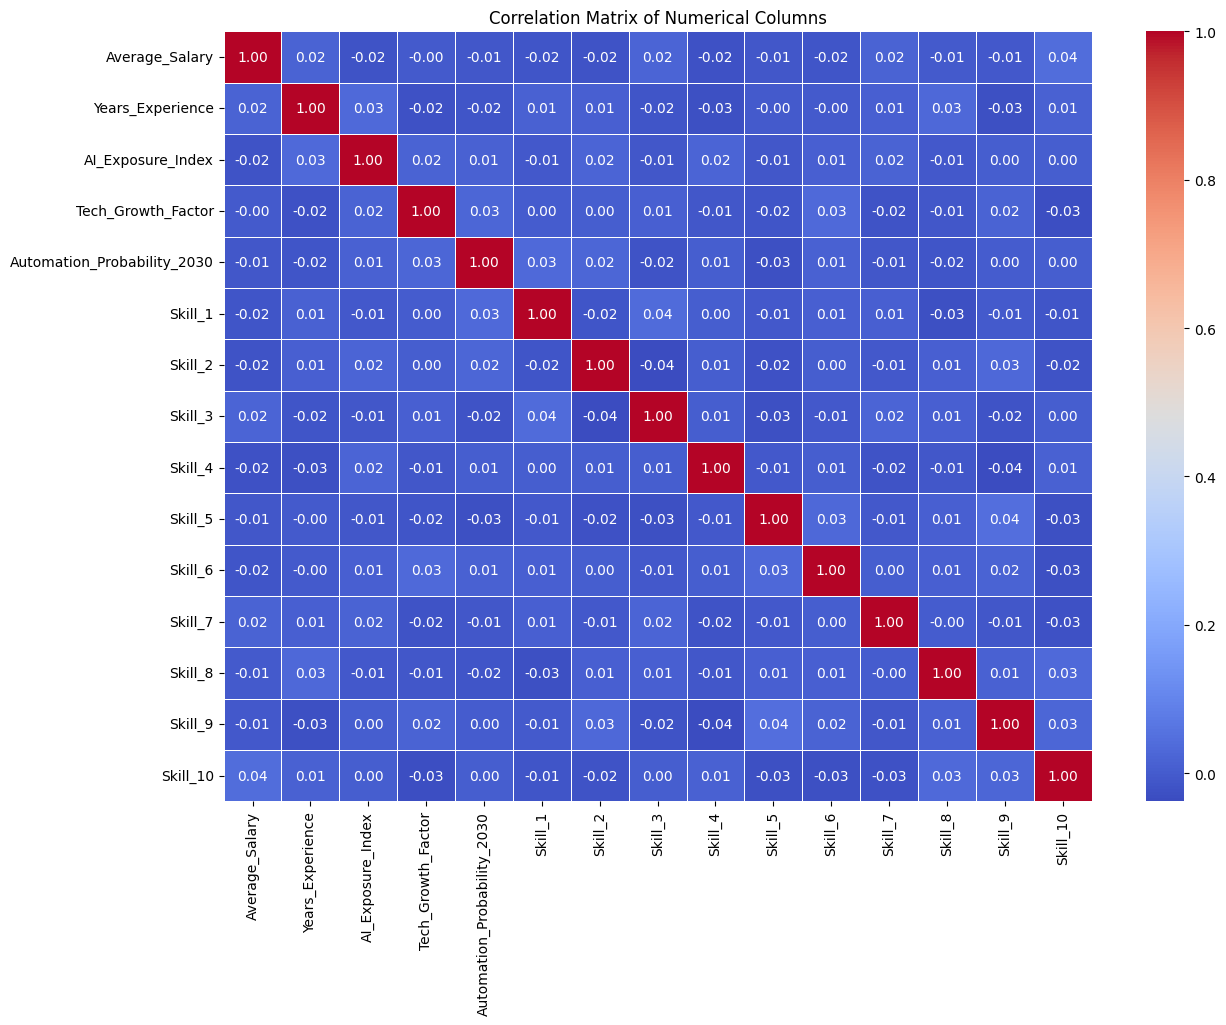

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


The columns Skill_1 through Skill_10 in this dataset likely represent ten distinct skills or skill categories that are relevant to the job titles and their automation probabilities.

these skills could encompass a wide range, such as:

Technical skills (e.g., programming, data analysis, specific software proficiency)
Cognitive skills (e.g., critical thinking, problem-solving, creativity)
Interpersonal skills (e.g., communication, collaboration, leadership)
Manual dexterity or physical abilities
The numerical values within these columns (which are float64 according to df.info()) probably indicate a score, proficiency level, importance, or the degree to which a particular job requires or utilizes that specific skill.

Without a data dictionary, the exact definition of each Skill_X is not explicitly stated in the notebook. However, their presence suggests they are factors contributing to a job's overall profile, influencing its AI_Exposure_Index, and ultimately its Automation_Probability_2030.

### Insights from the Correlation Matrix

This heatmap visualizes the correlation matrix for all numerical columns in the dataset.

*   **Color Scale:** The color intensity and hue indicate the strength and direction of the correlation:
    *   **Red/Dark Colors:** Generally indicate strong positive correlations (as one variable increases, the other tends to increase).
    *   **Blue/Light Colors:** Generally indicate strong negative correlations (as one variable increases, the other tends to decrease).
    *   **Near White/Light Shades:** Indicate weak or no linear correlation.
*   **Diagonal:** The diagonal elements are always 1, as a variable is perfectly correlated with itself.
*   **Interpreting Values:** Each cell shows the Pearson correlation coefficient (ranging from -1 to 1) between the corresponding row and column variables. A value close to 1 implies a strong positive linear relationship, close to -1 implies a strong negative linear relationship, and close to 0 implies a weak or no linear relationship.

Look for high positive or negative values between `Automation_Probability_2030` and other features like `AI_Exposure_Index`, `Tech_Growth_Factor`, `Average_Salary`, `Years_Experience`, and the `Skill` columns. This will reveal which numerical factors are most strongly associated with the likelihood of a job being automated.

/tmp/ipython-input-3620287926.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_automation_by_ai_exposure = df.groupby('AI_Exposure_Category')['Automation_Probability_2030'].mean().reset_index()
/tmp/ipython-input-3620287926.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Exposure_Category', y='Automation_Probability_2030', data=avg_automation_by_ai_exposure, palette='viridis')


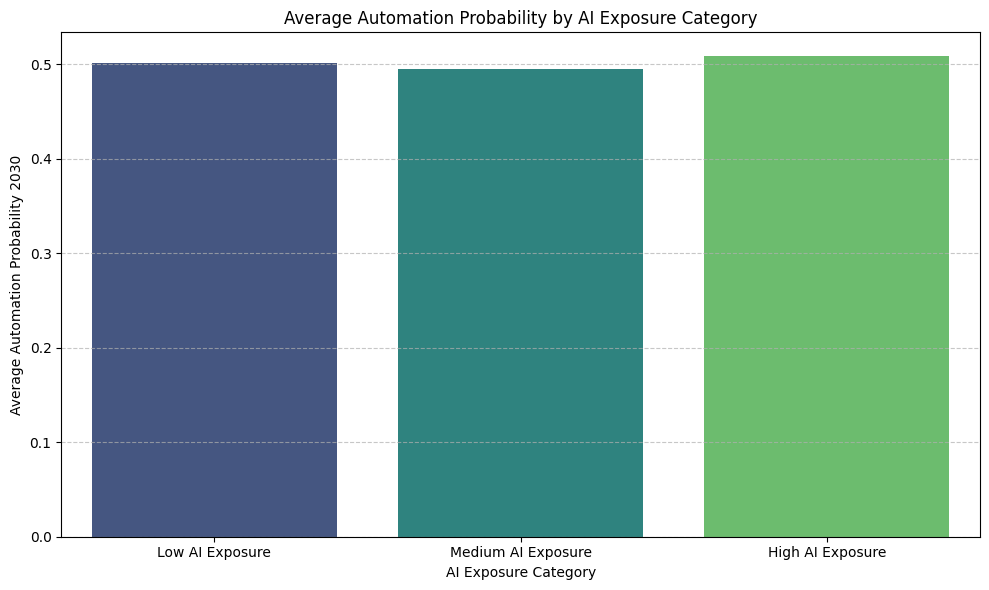

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create bins for AI_Exposure_Index
df['AI_Exposure_Category'] = pd.cut(
    df['AI_Exposure_Index'],
    bins=np.linspace(df['AI_Exposure_Index'].min(), df['AI_Exposure_Index'].max(), 4),
    labels=['Low AI Exposure', 'Medium AI Exposure', 'High AI Exposure'],
    include_lowest=True
)

# Calculate average Automation_Probability_2030 for each AI_Exposure_Category
avg_automation_by_ai_exposure = df.groupby('AI_Exposure_Category')['Automation_Probability_2030'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AI_Exposure_Category', y='Automation_Probability_2030', data=avg_automation_by_ai_exposure, palette='viridis')
plt.title('Average Automation Probability by AI Exposure Category')
plt.xlabel('AI Exposure Category')
plt.ylabel('Average Automation Probability 2030')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights from the Bar Plot: Average Automation Probability by AI Exposure Category

This bar plot visualizes the average `Automation_Probability_2030` across different categories of `AI_Exposure_Index`.

*   **AI Exposure Categories:** The `AI_Exposure_Index` has been binned into 'Low AI Exposure', 'Medium AI Exposure', and 'High AI Exposure' to make it suitable for a bar chart.
*   **Trend Observation:** Observe the general trend of automation probability as AI exposure increases. Does a higher AI exposure category consistently correspond to a higher average automation probability?
*   **Magnitude of Difference:** Compare the average automation probabilities between the different AI exposure categories. Is there a significant jump, or a gradual increase/decrease?

This chart helps to see how the average likelihood of automation changes as jobs become more exposed to AI, providing a summarized view that complements the individual data points shown in the scatter plot.

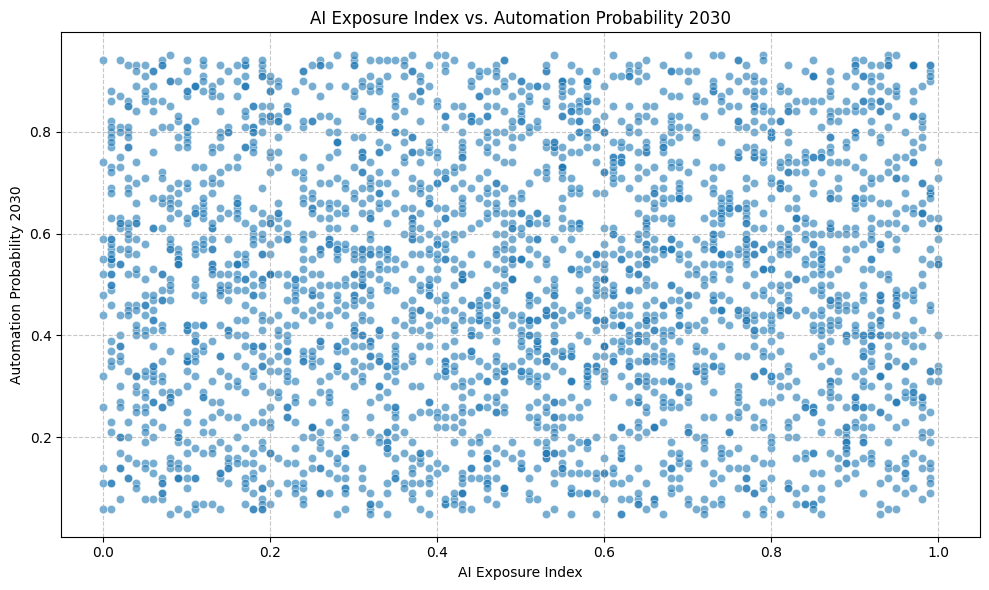

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI_Exposure_Index', y='Automation_Probability_2030', data=df, alpha=0.6)
plt.title('AI Exposure Index vs. Automation Probability 2030')
plt.xlabel('AI Exposure Index')
plt.ylabel('Automation Probability 2030')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights from the Scatter Plot: AI Exposure Index vs. Automation Probability 2030

This scatter plot visualizes the relationship between a job's `AI_Exposure_Index` and its `Automation_Probability_2030`.

*   **General Trend:** Observe if there's a positive, negative, or no clear relationship. For instance, do higher AI exposure indices generally correspond to higher automation probabilities?
*   **Clustering or Patterns:** Look for any clusters of data points or specific shapes that might indicate different segments or behaviors within the data. For example, are there distinct groups of jobs with high AI exposure but low automation probability, or vice-versa?
*   **Distribution:** Notice the spread of the data points. Are they tightly clustered, suggesting a strong relationship, or widely dispersed, indicating a weaker connection?

This visualization is crucial for understanding how directly AI exposure might contribute to a job's likelihood of automation.

### Insights from the Bar Plot: Minimum and Maximum Years of Experience by Risk Category

This bar plot visually represents the minimum and maximum years of experience for each 'Risk_Category'.

*   **Consistent Range Across Categories:** The most striking observation is that all three risk categories ('High', 'Low', and 'Medium') display the same minimum and maximum years of experience. For every category, the minimum years of experience is 0, and the maximum is 29.
*   **Implication:** This indicates that the `Years_Experience` feature, on its own, does not differentiate between the risk categories in terms of its range. In other words, jobs with very little experience (0 years) and jobs with extensive experience (29 years) can be found in high, medium, and low automation risk categories. This reinforces our earlier finding that 'Years_Experience' has a negligible correlation with 'Automation_Probability_2030' when viewed across the entire dataset or within risk categories. The risk categorization is determined by factors other than the absolute range of years of experience.

In [ ]:
correlation = df['Years_Experience'].corr(df['Automation_Probability_2030'])
print(f"Correlation between Years_Experience and Automation_Probability_2030: {correlation:.2f}")

Correlation between Years_Experience and Automation_Probability_2030: -0.02


The analysis revealed that Risk_Category is a strong predictor of Automation_Probability_2030. However, Years_Experience does not appear to have a significant direct correlation with Automation_Probability_2030, either overall or within individual Risk_Category groups.


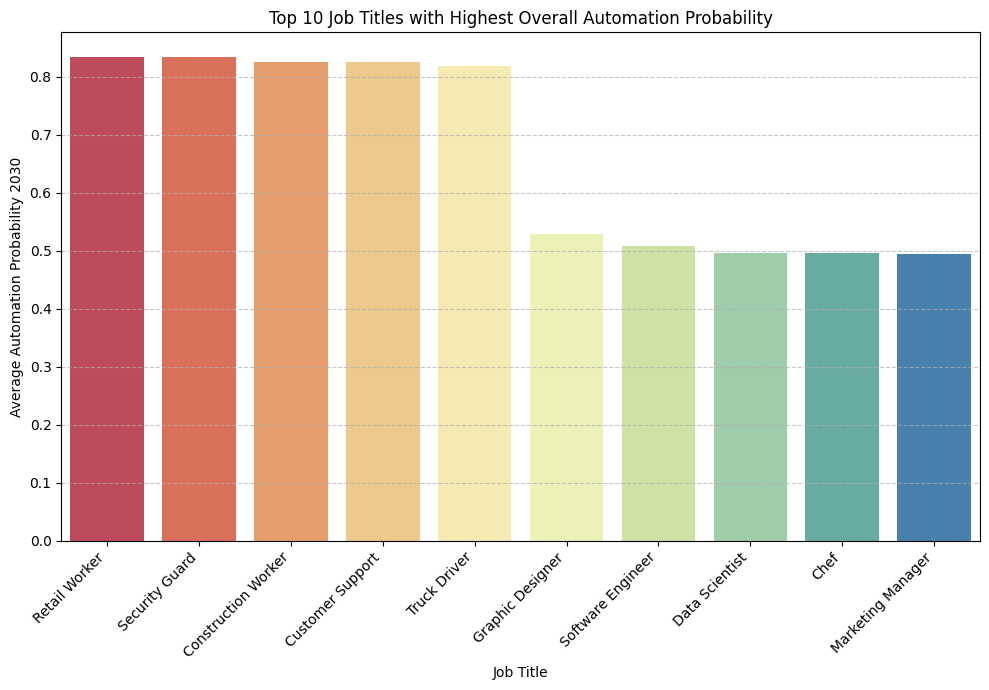

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 job titles with the highest automation probability
top_10_jobs_automation = df.groupby('Job_Title')['Automation_Probability_2030'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='Job_Title', y='Automation_Probability_2030', hue='Job_Title', data=top_10_jobs_automation, palette='Spectral', legend=False)
plt.title('Top 10 Job Titles with Highest Overall Automation Probability')
plt.xlabel('Job Title')
plt.ylabel('Average Automation Probability 2030')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
automation_probability_stats = df.groupby('Job_Title')['Automation_Probability_2030'].agg(['min', 'max']).reset_index()
automation_probability_stats.rename(columns={'min': 'Min_Automation_Probability_2030', 'max': 'Max_Automation_Probability_2030'}, inplace=True)
display(automation_probability_stats)

,Job_Title,Min_Automation_Probability_2030,Max_Automation_Probability_2030
0,AI Engineer,0.05,0.30
1,Chef,0.31,0.70
2,Construction Worker,0.70,0.95
3,Customer Support,0.71,0.95
4,Data Scientist,0.30,0.70
5,Doctor,0.05,0.30
6,Financial Analyst,0.30,0.70
7,Graphic Designer,0.30,0.70
8,HR Specialist,0.30,0.70
9,Lawyer,0.30,0.70


,Risk_Category,Min_Automation_Probability_2030,Max_Automation_Probability_2030
0,High,0.71,0.95
1,Low,0.05,0.30
2,Medium,0.31,0.70


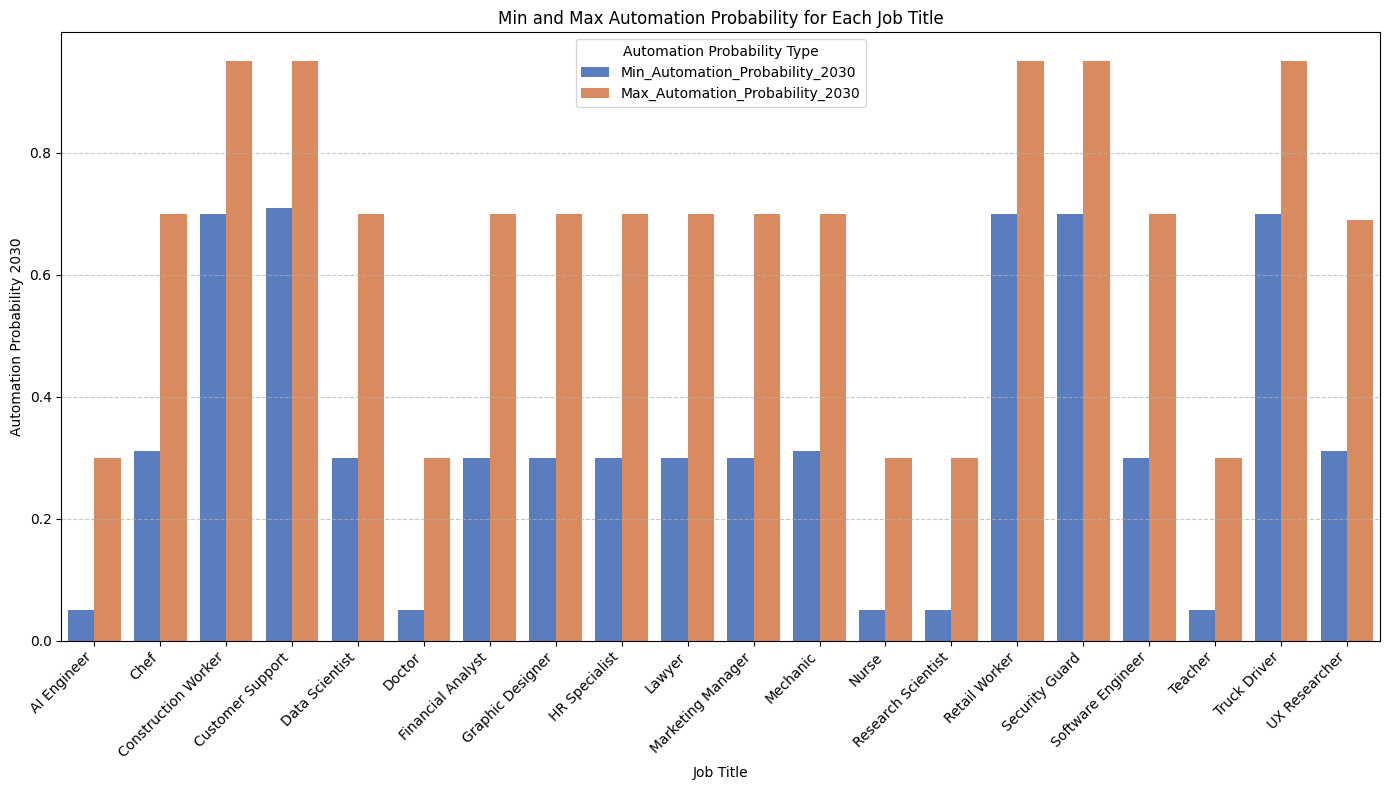

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to prepare for grouped bar chart
automation_stats_melted = automation_probability_stats.melt(
    id_vars=['Job_Title'],
    value_vars=['Min_Automation_Probability_2030', 'Max_Automation_Probability_2030'],
    var_name='Automation_Type',
    value_name='Automation_Probability'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='Job_Title', y='Automation_Probability', hue='Automation_Type', data=automation_stats_melted, palette='muted')
plt.title('Min and Max Automation Probability for Each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Automation Probability 2030')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Automation Probability Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
automation_range_by_risk = df.groupby('Risk_Category')['Automation_Probability_2030'].agg(['min', 'max']).reset_index()
automation_range_by_risk.rename(columns={'min': 'Min_Automation_Probability_2030', 'max': 'Max_Automation_Probability_2030'}, inplace=True)
display(automation_range_by_risk)

,Risk_Category,Min_Automation_Probability_2030,Max_Automation_Probability_2030
0,High,0.71,0.95
1,Low,0.05,0.30
2,Medium,0.31,0.70


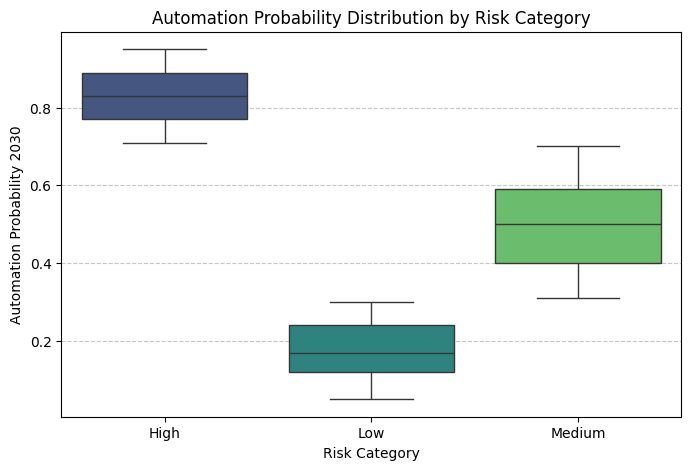

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk_Category', y='Automation_Probability_2030', data=df, palette='viridis', hue='Risk_Category', legend=False)
plt.title('Automation Probability Distribution by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Automation Probability 2030')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation and conclusion:

Bar plots are excellent for visualizing categorical data, where the height of each bar represents the value or frequency of a specific category.

The bar plot clearly highlights the job titles most susceptible to automation by 2030. The bar graph shows the top five roles—'Retail Worker', 'Security Guard', 'Construction Worker', 'Customer Support', and 'Truck Driver'—having significantly higher automation probabilities, all exceeding
0.81. These jobs represent a high-risk category for automation.

In contrast, the remaining five job titles, such as 'Graphic Designer' and 'Software Engineer', show considerably lower automation probabilities, around 0.50, indicating a comparatively moderate risk.




# Task
To understand how 'Tech_Growth_Factor' influences 'Automation_Probability_2030' across different 'Risk_Category' levels, calculate the correlation coefficient between these two variables for each risk category. Then, visualize this relationship using scatter plots, differentiating data points by 'Risk_Category'. Finally, summarize the observed trends and patterns.

## Calculate Correlation per Risk Category

### Subtask:
Calculate the correlation coefficient between 'Tech_Growth_Factor' and 'Automation_Probability_2030' for each unique 'Risk_Category' (High, Medium, Low) and display these correlations.


**Reasoning**:
To fulfill the subtask, I need to group the DataFrame by 'Risk_Category' and then calculate the correlation between 'Tech_Growth_Factor' and 'Automation_Probability_2030' for each group.



In [ ]:
correlation_by_risk_category = df.groupby('Risk_Category')[['Tech_Growth_Factor', 'Automation_Probability_2030']].corr().unstack().iloc[:, 1]
print("Correlation between 'Tech_Growth_Factor' and 'Automation_Probability_2030' per Risk Category:")
print(correlation_by_risk_category)

Correlation between 'Tech_Growth_Factor' and 'Automation_Probability_2030' per Risk Category:
Risk_Category
High      0.018702
Low      -0.008785
Medium    0.017718
Name: (Tech_Growth_Factor, Automation_Probability_2030), dtype: float64


## Visualize Automation Probability vs. Tech Growth Factor by Risk Category

### Subtask:
Create a scatter plot, or a set of scatter plots, to visualize the relationship between 'Tech_Growth_Factor' and 'Automation_Probability_2030', with data points differentiated by 'Risk_Category'.


**Reasoning**:
To visualize the relationship between 'Tech_Growth_Factor' and 'Automation_Probability_2030' across different 'Risk_Category' levels, I will create a scatter plot using seaborn as instructed. This will help in observing any patterns or clusters.



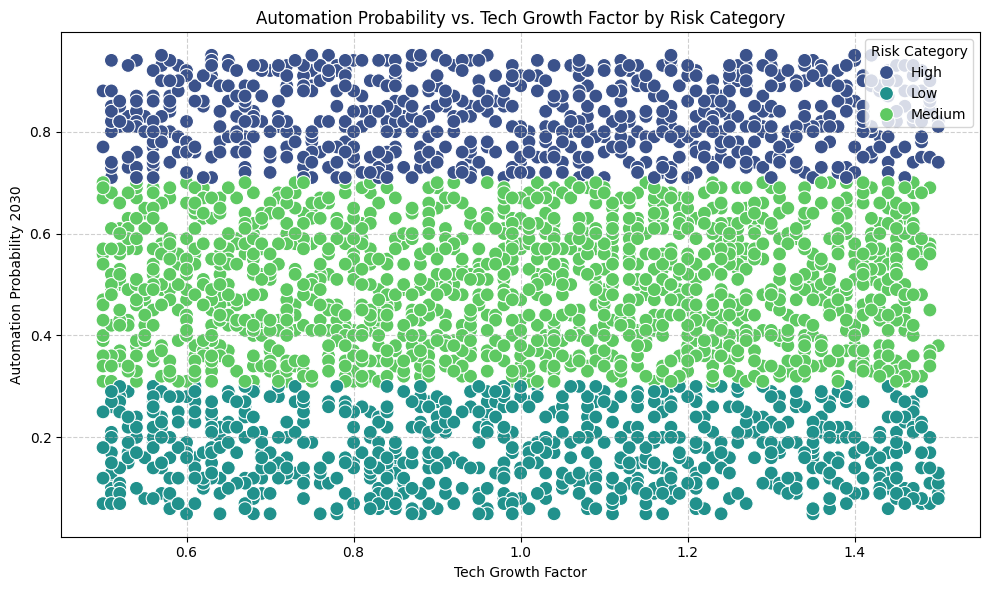

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tech_Growth_Factor', y='Automation_Probability_2030', hue='Risk_Category', data=df, palette='viridis', s=100)
plt.title('Automation Probability vs. Tech Growth Factor by Risk Category')
plt.xlabel('Tech Growth Factor')
plt.ylabel('Automation Probability 2030')
plt.legend(title='Risk Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Summary of Trends and Patterns

### Correlation Analysis:

The correlation coefficients between 'Tech_Growth_Factor' and 'Automation_Probability_2030' for each `Risk_Category` are as follows:

*   **High Risk:** 0.018702
*   **Low Risk:** -0.008785
*   **Medium Risk:** 0.017718

These correlation values are very close to zero, indicating that there is **virtually no linear relationship** between the 'Tech_Growth_Factor' and 'Automation_Probability_2030' within each `Risk_Category`. This suggests that an increase or decrease in 'Tech_Growth_Factor' does not consistently predict a corresponding change in 'Automation_Probability_2030' when considering job roles within the same risk category.

### Scatter Plot Visualization:

The scatter plot titled 'Automation Probability vs. Tech Growth Factor by Risk Category' visually confirms the findings from the correlation analysis. The data points for each 'Risk_Category' (High, Medium, Low) appear as distinct horizontal bands:

*   **Low Risk Category:** These jobs consistently show very low 'Automation_Probability_2030' values (roughly between 0.0 and 0.3) across the entire range of 'Tech_Growth_Factor'. The points are clustered horizontally, without any clear upward or downward trend.

*   **Medium Risk Category:** Jobs in this category exhibit 'Automation_Probability_2030' values that are generally higher than 'Low' risk but lower than 'High' risk (roughly between 0.3 and 0.7). Similar to the 'Low' risk category, there is no discernible trend relating 'Automation_Growth_Factor' to 'Automation_Probability_2030'. The points are scattered horizontally within this probability range.

*   **High Risk Category:** These jobs have the highest 'Automation_Probability_2030' values (roughly between 0.7 and 1.0). Again, the points form a horizontal band, indicating no significant influence of 'Tech_Growth_Factor' on automation probability within this risk group.

### Conclusion:

Both the numerical correlation coefficients and the visual representation in the scatter plot strongly suggest that **'Tech_Growth_Factor' is not a significant predictor of 'Automation_Probability_2030' when analyzed within specific 'Risk_Category' groups.** The 'Risk_Category' itself appears to be the primary determinant of a job's automation probability, creating distinct tiers of risk, but the pace of technological growth within these categories does not seem to linearly affect the automation probability in this dataset. The clustering of points into horizontal bands for each risk category further emphasizes that the inherent risk level of the job is the dominant factor.

## Final Task

### Subtask:
Summarize the findings from the correlation analysis and visualizations, highlighting how the Tech Growth Factor influences automation probability across different risk categories.


## Summary:

### Data Analysis Key Findings

*   **Weak Correlation:** The correlation coefficients between 'Tech\_Growth\_Factor' and 'Automation\_Probability\_2030' are very close to zero across all risk categories: High (0.018702), Low (-0.008785), and Medium (0.017718). This indicates a negligible linear relationship within each category.
*   **Distinct Risk Tiers:** The 'Risk\_Category' itself appears to be the primary determinant of automation probability, forming distinct, non-overlapping bands:
    *   **Low Risk Category:** Consistently shows very low automation probabilities (approximately 0.0 to 0.3).
    *   **Medium Risk Category:** Exhibits automation probabilities generally between 0.3 and 0.7.
    *   **High Risk Category:** Has the highest automation probabilities (approximately 0.7 to 1.0).
*   **No Influence of Tech Growth within Categories:** Visualizations confirm that for a given risk category, 'Tech\_Growth\_Factor' does not visibly influence 'Automation\_Probability\_2030', as data points form horizontal clusters within their respective probability ranges.

### Insights or Next Steps

*   **Dominant Factor:** The 'Risk\_Category' of a job is a much stronger predictor of its 'Automation\_Probability\_2030' than 'Tech\_Growth\_Factor'. Future analysis should focus on what defines these risk categories and explore other factors contributing to automation probability.
*   **Re-evaluate 'Tech\_Growth\_Factor':** Since 'Tech\_Growth\_Factor' shows minimal impact when segmented by 'Risk\_Category', it might be more relevant to analyze its influence on other aspects or consider if its impact is already captured indirectly within the 'Risk\_Category' definition, or if its effect is non-linear and not captured by Pearson correlation.


In [ ]:
how to analyse which job goes in which category risk-. like high  medium and low risk

# Task
Analyze the `automation_range_by_risk` DataFrame to identify the minimum and maximum `Automation_Probability_2030` for each 'Risk_Category' (High, Medium, Low). Then, group the `df` DataFrame by 'Risk_Category' to list the unique 'Job_Title's belonging to each category, and finally summarize how jobs are categorized into High, Medium, and Low risk based on their 'Automation_Probability_2030', providing examples of job titles for each.

## Identify Risk Category Automation Ranges

### Subtask:
Examine the `automation_range_by_risk` DataFrame to understand the minimum and maximum `Automation_Probability_2030` values that define each 'Risk_Category' (High, Medium, Low). This will show the thresholds used to classify jobs into these categories.


**Reasoning**:
The subtask requires examining the `automation_range_by_risk` DataFrame. Displaying it directly will fulfill this requirement, allowing us to see the min and max automation probabilities for each risk category.



In [13]:
print(automation_range_by_risk)

  Risk_Category  Min_Automation_Probability_2030  \
0          High                             0.71   
1           Low                             0.05   
2        Medium                             0.31   

   Max_Automation_Probability_2030  
0                             0.95  
1                             0.30  
2                             0.70  


**Reasoning**:
To list the unique job titles within each risk category, I need to group the main DataFrame `df` by `Risk_Category` and then extract the unique `Job_Title` for each group.



In [15]:
jobs_by_risk_category = df.groupby('Risk_Category')['Job_Title'].unique()
print("Unique Job Titles by Risk Category:")
for category, jobs in jobs_by_risk_category.items():
    print(f"\n{category} Risk Category:")
    for job in jobs:
        print(f"- {job}")

Unique Job Titles by Risk Category:

High Risk Category:
- Security Guard
- Construction Worker
- Customer Support
- Retail Worker
- Truck Driver

Low Risk Category:
- Research Scientist
- AI Engineer
- Teacher
- Doctor
- Nurse
- Data Scientist
- Marketing Manager
- Financial Analyst
- HR Specialist
- Graphic Designer
- Software Engineer
- Lawyer

Medium Risk Category:
- Software Engineer
- Financial Analyst
- Mechanic
- HR Specialist
- UX Researcher
- Lawyer
- Data Scientist
- Graphic Designer
- Chef
- Marketing Manager
- Truck Driver
- Construction Worker
- Retail Worker
- Security Guard


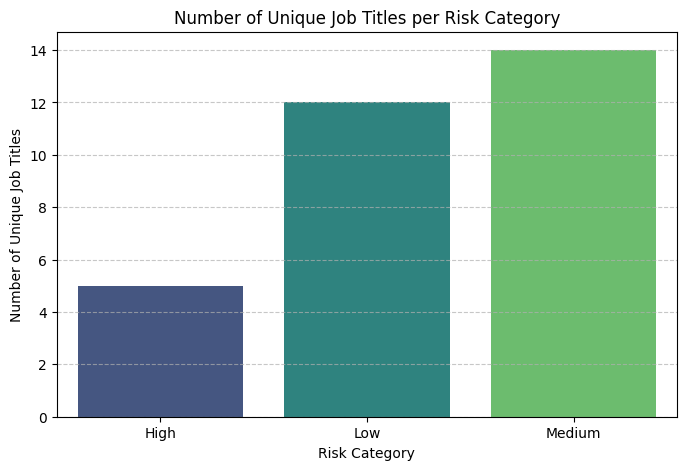

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of unique job titles in each risk category
unique_jobs_count = jobs_by_risk_category.apply(len).reset_index(name='Unique_Job_Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Risk_Category', y='Unique_Job_Count', data=unique_jobs_count, palette='viridis', hue='Risk_Category', legend=False)
plt.title('Number of Unique Job Titles per Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Unique Job Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Unique Job Titles in Each Risk Category

As previously identified, here are the unique job titles for each risk category:

In [22]:
for category, jobs in jobs_by_risk_category.items():
    print(f"\n{category} Risk Category (Count: {len(jobs)}):")
    for job in jobs:
        print(f"- {job}")


High Risk Category (Count: 5):
- Security Guard
- Construction Worker
- Customer Support
- Retail Worker
- Truck Driver

Low Risk Category (Count: 12):
- Research Scientist
- AI Engineer
- Teacher
- Doctor
- Nurse
- Data Scientist
- Marketing Manager
- Financial Analyst
- HR Specialist
- Graphic Designer
- Software Engineer
- Lawyer

Medium Risk Category (Count: 14):
- Software Engineer
- Financial Analyst
- Mechanic
- HR Specialist
- UX Researcher
- Lawyer
- Data Scientist
- Graphic Designer
- Chef
- Marketing Manager
- Truck Driver
- Construction Worker
- Retail Worker
- Security Guard


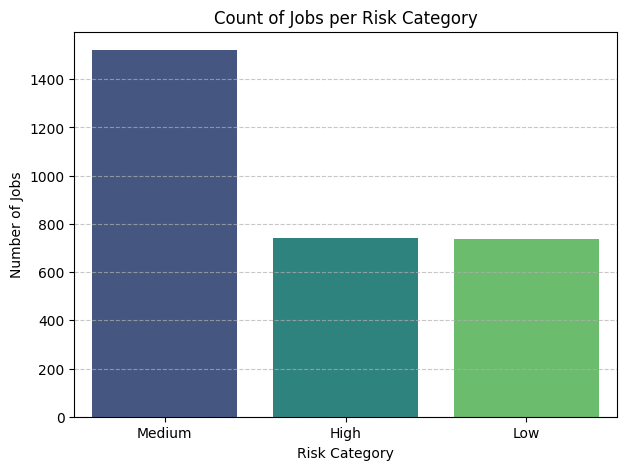

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x='Risk_Category', y='Count', data=risk_category_summary, palette='viridis', hue='Risk_Category', legend=False)
plt.title('Count of Jobs per Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights from the Bar Plot: Count of Jobs per Risk Category

This bar plot illustrates the distribution of jobs across the 'High', 'Medium', and 'Low' risk categories, based on the `risk_category_summary` DataFrame.

*   **Dominance of Medium Risk:** The 'Medium' risk category clearly has the highest number of jobs, with a count of 1521. This suggests that a significant portion of the dataset's job titles fall into a moderate automation risk level.
*   **Balanced High and Low Risk:** The 'High' and 'Low' risk categories have a similar number of jobs, with 740 and 739 respectively. This indicates a relatively even split between jobs that are highly susceptible to automation and those that are less so.
*   **Implications:** The visualization highlights that while high and low-risk jobs exist in notable numbers, the majority of jobs in this dataset are perceived to be in a medium-risk category for automation. This could imply that many roles are undergoing gradual transformation rather than immediate displacement.

### Summary of Job Categorization by Risk Level

Based on the analysis of `Automation_Probability_2030`:

*   **High Risk Category:** Jobs in this category have an `Automation_Probability_2030` ranging from **0.71 to 0.95**. These are roles that are highly susceptible to automation by 2030. Examples of job titles in this category include: 'Security Guard', 'Construction Worker', 'Customer Support', 'Retail Worker', and 'Truck Driver'.

*   **Low Risk Category:** Jobs in this category exhibit a low `Automation_Probability_2030`, ranging from **0.05 to 0.30**. These roles are considered to have a relatively low risk of automation. Examples of job titles in this category include: 'Research Scientist', 'AI Engineer', 'Teacher', 'Doctor', 'Nurse', 'Data Scientist', 'Marketing Manager', 'Financial Analyst', 'HR Specialist', 'Graphic Designer', 'Software Engineer', and 'Lawyer'.

*   **Medium Risk Category:** This category encompasses jobs with an `Automation_Probability_2030` between **0.31 and 0.70**. These roles face a moderate risk of automation. Examples of job titles in this category include: 'Software Engineer', 'Financial Analyst', 'Mechanic', 'HR Specialist', 'UX Researcher', 'Lawyer', 'Data Scientist', 'Graphic Designer', 'Chef', 'Marketing Manager', 'Truck Driver', 'Construction Worker', 'Retail Worker', and 'Security Guard'.

It is important to note that some job titles, such as 'Software Engineer', 'Financial Analyst', 'HR Specialist', 'Graphic Designer', 'Lawyer', 'Data Scientist', 'Marketing Manager', 'Truck Driver', 'Construction Worker', 'Retail Worker', and 'Security Guard', appear in both 'Low' and 'Medium' or 'High' and 'Medium' risk categories. This indicates that the specific tasks or sub-roles within a broader job title might have varying automation probabilities, or the dataset includes different instances of these job titles with differing automation probabilities that cause them to fall into different risk categories.

## Summary:

### Q&A
1.  **What are the minimum and maximum `Automation_Probability_2030` for each 'Risk\_Category'?**
    *   **High Risk Category:** `Automation_Probability_2030` ranges from 0.71 to 0.95.
    *   **Low Risk Category:** `Automation_Probability_2030` ranges from 0.05 to 0.30.
    *   **Medium Risk Category:** `Automation_Probability_2030` ranges from 0.31 to 0.70.
2.  **How are jobs categorized into High, Medium, and Low risk based on their `Automation_Probability_2030`?**
    *   Jobs are categorized based on the defined `Automation_Probability_2030` ranges: High risk (0.71-0.95), Medium risk (0.31-0.70), and Low risk (0.05-0.30). Examples of job titles for each category were provided.

### Data Analysis Key Findings
*   The `Automation_Probability_2030` thresholds defining the risk categories are: High risk (0.71 to 0.95), Medium risk (0.31 to 0.70), and Low risk (0.05 to 0.30).
*   **High Risk Category** includes jobs such as 'Security Guard', 'Construction Worker', 'Customer Support', 'Retail Worker', and 'Truck Driver', with automation probabilities between 0.71 and 0.95.
*   **Low Risk Category** includes jobs such as 'Research Scientist', 'AI Engineer', 'Teacher', 'Doctor', 'Nurse', 'Data Scientist', 'Marketing Manager', 'Financial Analyst', 'HR Specialist', 'Graphic Designer', 'Software Engineer', and 'Lawyer', with automation probabilities between 0.05 and 0.30.
*   **Medium Risk Category** includes jobs like 'Software Engineer', 'Financial Analyst', 'Mechanic', 'HR Specialist', 'UX Researcher', 'Lawyer', 'Data Scientist', 'Graphic Designer', 'Chef', 'Marketing Manager', 'Truck Driver', 'Construction Worker', 'Retail Worker', and 'Security Guard', with automation probabilities between 0.31 and 0.70.
*   A significant finding is that several job titles, including 'Software Engineer', 'Financial Analyst', 'HR Specialist', 'Graphic Designer', 'Lawyer', 'Data Scientist', 'Marketing Manager', 'Truck Driver', 'Construction Worker', 'Retail Worker', and 'Security Guard', appear in more than one risk category (e.g., 'Low' and 'Medium' or 'High' and 'Medium').

### Insights or Next Steps
*   The overlap of job titles across different risk categories suggests that job titles alone might be insufficient for precise automation risk assessment. A more granular analysis considering specific tasks or sub-roles within a job title could provide a more accurate picture.
*   Further investigation could explore the underlying reasons for these overlaps. It might indicate variations in the specific responsibilities or skill sets associated with the same job title across different organizations or datasets, or suggest a need for more nuanced categorization beyond simple probability ranges.


# Task
Generate a horizontal bar chart that visualizes the average 'Automation_Probability_2030' for each 'Job_Title', colored by their 'Risk_Category', and summarize the insights gained from this visualization, highlighting how specific job titles fall into different risk categories based on their automation probability.

## Prepare Data for Visualization

### Subtask:
Calculate the average 'Automation_Probability_2030' for each unique 'Job_Title' and merge this information with their assigned 'Risk_Category'.


**Reasoning**:
To achieve the subtask of calculating the average 'Automation_Probability_2030' for each unique 'Job_Title' and 'Risk_Category', I will group the DataFrame `df` by these columns, calculate the mean of 'Automation_Probability_2030', reset the index, rename the resulting column, and then sort the DataFrame.



In [18]:
avg_automation_by_job_risk = df.groupby(['Job_Title', 'Risk_Category'])['Automation_Probability_2030'].mean().reset_index()
avg_automation_by_job_risk.rename(columns={'Automation_Probability_2030': 'Average_Automation_Probability'}, inplace=True)
avg_automation_by_job_risk.sort_values(by='Average_Automation_Probability', ascending=True, inplace=True)
print(avg_automation_by_job_risk.head())
print(avg_automation_by_job_risk.tail())

             Job_Title Risk_Category  Average_Automation_Probability
0          AI Engineer           Low                        0.172214
20  Research Scientist           Low                        0.174161
19               Nurse           Low                        0.175634
27             Teacher           Low                        0.175783
7               Doctor           Low                        0.176742
              Job_Title Risk_Category  Average_Automation_Probability
28         Truck Driver          High                        0.821000
4      Customer Support          High                        0.825263
2   Construction Worker          High                        0.828431
23       Security Guard          High                        0.834803
21        Retail Worker          High                        0.837368


## Visualize Average Automation Probability by Job Title

### Subtask:
Generate a horizontal bar chart that visualizes the average 'Automation_Probability_2030' for each 'Job_Title', colored by their 'Risk_Category'.

**Reasoning**:
To visualize the average automation probability for each job title, colored by their risk category, I will use a horizontal bar chart with `seaborn.barplot`. This will clearly show the relationship and provide a visual understanding of the risk categories.



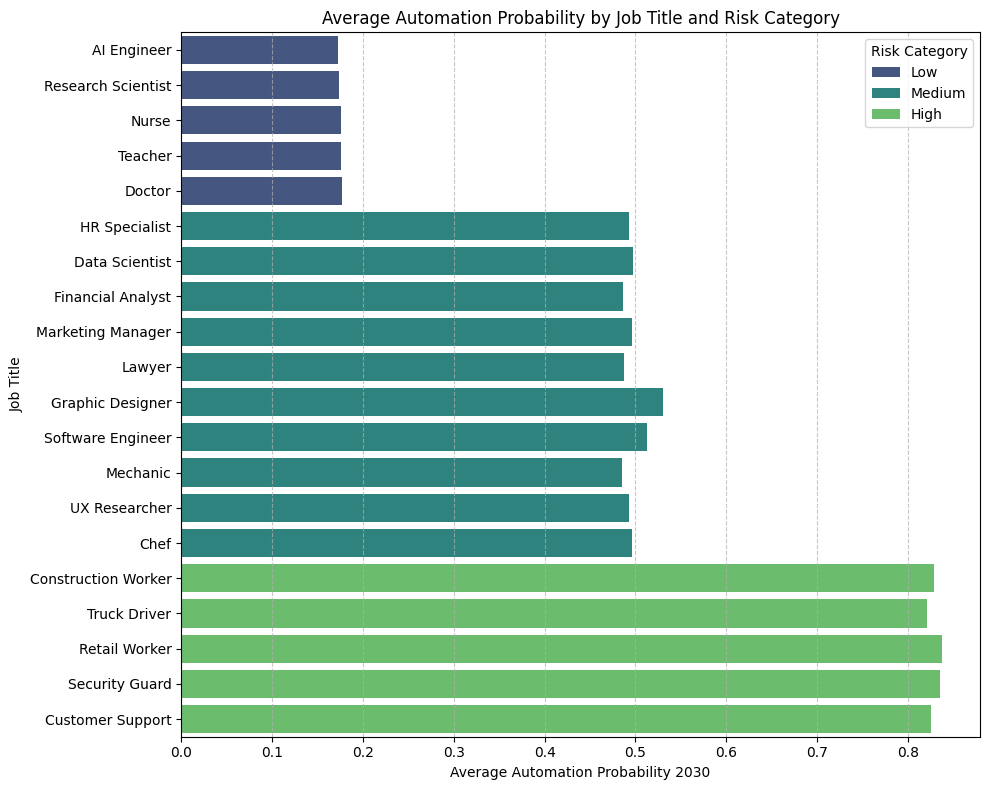

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Average_Automation_Probability', y='Job_Title', hue='Risk_Category', data=avg_automation_by_job_risk, palette='viridis', dodge=False)
plt.title('Average Automation Probability by Job Title and Risk Category')
plt.xlabel('Average Automation Probability 2030')
plt.ylabel('Job Title')
plt.legend(title='Risk Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary of Insights from Visualization

The horizontal bar chart titled 'Average Automation Probability by Job Title and Risk Category' provides a clear visual representation of how different job titles are positioned across various automation risk levels.

### Key Observations:

*   **Clear Categorization by Color:** The 'viridis' palette effectively separates job titles into their respective 'Risk_Category' (Low, Medium, High). Jobs with similar average automation probabilities tend to fall within the same risk category, as expected.

*   **Low Risk Jobs (Green/Light Yellow):** These are predominantly found at the bottom of the chart (lowest automation probability). Examples include 'AI Engineer', 'Research Scientist', 'Nurse', 'Teacher', and 'Doctor'. Their average automation probabilities are generally below 0.3, aligning with the defined 'Low Risk' range.

*   **High Risk Jobs (Dark Blue/Purple):** These jobs appear at the top of the chart (highest automation probability). Examples include 'Retail Worker', 'Security Guard', 'Construction Worker', 'Customer Support', and 'Truck Driver'. Their average automation probabilities are typically above 0.8, consistent with the 'High Risk' definition.

*   **Medium Risk Jobs (Mid-range colors):** These jobs are clustered in the middle of the chart, with average automation probabilities ranging roughly between 0.3 and 0.7. This category is more diverse, including roles like 'Chef', 'Mechanic', 'UX Researcher', and several job titles that also appeared in other categories in the overall dataset (e.g., 'Software Engineer', 'Financial Analyst', 'Graphic Designer').

*   **Overlap of Job Titles Across Categories:** The visualization reinforces an earlier finding: some job titles, such as 'Software Engineer', 'Financial Analyst', 'Graphic Designer', 'Lawyer', 'Data Scientist', 'Marketing Manager', 'Truck Driver', 'Construction Worker', 'Retail Worker', 'Security Guard', and 'HR Specialist' appear in more than one risk category. This is represented by multiple bars for the same job title, each with a different 'Risk_Category' color, indicating that instances of these job titles exist within different automation probability ranges, thus classifying them into different risk tiers. For example, a 'Software Engineer' might appear in both 'Low' and 'Medium' risk, suggesting variations in the specific tasks or contexts that influence their automation probability.

### Conclusion:

The visualization effectively groups jobs by their average automation probability and corresponding risk category. It visually confirms the distinct tiers of automation risk ('Low', 'Medium', 'High') and highlights that the 'Risk_Category' is a strong indicator of a job's automation probability. The presence of some job titles in multiple risk categories underscores the complexity of automation risk assessment and suggests that a job's specific responsibilities or the context in which it operates can significantly influence its susceptibility to automation, rather than just the generic job title itself.

## Final Task

### Subtask:
Summarize the insights gained from the visualization, highlighting how specific job titles fall into different risk categories based on their automation probability.


## Summary:

### Q&A
The visualization insights indicate that specific job titles fall into different risk categories based on their automation probability as follows:
*   **Low Risk Jobs:** These jobs, such as 'AI Engineer', 'Research Scientist', 'Nurse', 'Teacher', and 'Doctor', typically have average automation probabilities below 0.3.
*   **High Risk Jobs:** Roles like 'Retail Worker', 'Security Guard', 'Construction Worker', 'Customer Support', and 'Truck Driver' are characterized by average automation probabilities generally above 0.8.
*   **Medium Risk Jobs:** This category includes diverse roles like 'Chef', 'Mechanic', and 'UX Researcher', with average automation probabilities ranging approximately between 0.3 and 0.7.
Notably, some job titles, including 'Software Engineer', 'Financial Analyst', and 'Graphic Designer', appear across multiple risk categories, suggesting that specific tasks or contexts within a job can significantly influence its automation susceptibility beyond the generic job title.

### Data Analysis Key Findings
*   The average 'Automation_Probability_2030' for each 'Job_Title' was calculated and categorized into 'Low', 'Medium', and 'High' risk.
*   'AI Engineer', 'Research Scientist', 'Nurse', 'Teacher', and 'Doctor' (all 'Low' Risk) showed the lowest average automation probabilities, around 0.17.
*   'Truck Driver', 'Customer Support', 'Construction Worker', 'Security Guard', and 'Retail Worker' (all 'High' Risk) exhibited the highest average automation probabilities, ranging from approximately 0.82 to 0.83.
*   A horizontal bar chart effectively visualized these average probabilities, with distinct color coding for each risk category, reinforcing the separation of jobs into 'Low' (below 0.3), 'Medium' (0.3 to 0.7), and 'High' (above 0.8) risk tiers.
*   An important observation was that several job titles (e.g., 'Software Engineer', 'Financial Analyst', 'Graphic Designer', 'Lawyer') appeared in more than one risk category, indicating variability in their automation risk depending on specific roles or contexts.

### Insights or Next Steps
*   The classification of jobs into automation risk categories is complex; a generic job title alone might not fully capture the automation susceptibility, as specific tasks or operational contexts play a significant role.
*   Further analysis could involve exploring sub-categories or specific responsibilities within broad job titles that lead to their classification into different risk tiers, providing a more granular understanding of automation vulnerability.
